# Finding the Best Markets for Advertisement

For an an e-learning company that offers courses on programming (mostly web and mobile development courses, but also other domains, like data science, game development, etc), we would like to promote the product and to invest some money in advertisement. The goal in this project is to find out the two best markets to advertise our product in

We use data from freeCodeCamp's 2017 New Coder Survey: https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969

The survey data is publicly available in this GitHub repository: https://github.com/freeCodeCamp/2017-new-coder-survey


In [241]:
import pandas as pd
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [242]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [243]:
fcc.sample(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
14393,26.0,1.0,1.0,0.0,App Academy,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9051,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6837,24.0,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12050,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8565,18.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

------------
Chekcing for Sample Representativity
----------

The "JobRoleInterest" column describes for every participant the role(s) they'd be interested in working

In [244]:
round(fcc['JobRoleInterest'].value_counts(normalize=True, dropna=False) * 100, 1)

NaN                                                                                                                                                                                 61.5
Full-Stack Web Developer                                                                                                                                                             4.5
  Front-End Web Developer                                                                                                                                                            2.5
  Data Scientist                                                                                                                                                                     0.8
Back-End Web Developer                                                                                                                                                               0.8
  Mobile Developer                                                         

From the results one can conclude that most popular roles are related to web or mobile development.
Calculating how many people are interested in at least one of these two subjects:

In [245]:
def web_mobile(element):
    if ("Web" in element or "Mobile" in element):
        return 1
    else:
        return 0

fcc['Web_Mobile'] = fcc['JobRoleInterest'].dropna().apply(web_mobile)

In [246]:
freq_table_web_mobile = fcc['Web_Mobile'].value_counts(normalize=True) \
* 100

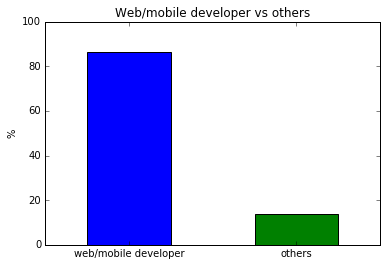

In [247]:
%matplotlib inline
import matplotlib.pyplot as plt
freq_table_web_mobile.plot('bar')
plt.title('Web/mobile developer vs others')
plt.ylabel('%')
plt.xticks([0,1],['web/mobile developer','others'], rotation=0)
plt.ylim(0,100)
plt.show()

Th majority (more than 85%) of participants are interests in web/mobile developer roles

------------
New Coders - Locations & Densities
-----------

The "CountryCitizen" variable describes the country of origin for each participant, and the "CountryLive" variable describes what country each participants lives in (which may be different than the origin country). For our analysis, we'll work with the 'CountryLive' variable because we're interested where people actually live at the moment when we run the ads.

The goal is to find the two best countries to advertise in.

In [248]:
fcc_dropna_job = fcc[fcc['JobRoleInterest'].notnull()].copy()

In [249]:
round(fcc_dropna_job['CountryLive'].value_counts(normalize=True) * 100\
      , 1).head(10)

United States of America    45.7
India                        7.7
United Kingdom               4.6
Canada                       3.8
Poland                       1.9
Brazil                       1.9
Germany                      1.8
Australia                    1.6
Russia                       1.5
Ukraine                      1.3
Name: CountryLive, dtype: float64

USA and India are the countries with most of the new coders.


But we need to go more in depth by figuring out how much money new coders are actually willing to spend on learning.

The "MoneyForLearning" column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey

Also as the courses are in English we focus on the first 4 countries in the above list (which happen to have English as official language): USA, India, UK, Canada

money spent per month (replacing 0 month by 1):

In [250]:
fcc_dropna_job['MonthsProgramming'].replace(0,1, inplace = True)

In [251]:
fcc_dropna_job['MoneyPerMonth'] = fcc_dropna_job['MoneyForLearning'] \
/ fcc_dropna_job['MonthsProgramming']

In [252]:
fcc_dropna_job_money = fcc_dropna_job[fcc_dropna_job\
                                              ['MoneyPerMonth'].notnull()]

In [253]:
eng_countries = ['United States of America','India', 'United Kingdom',\
                 'Canada']

fcc_dropna_job_money.groupby(by='CountryLive').mean().loc[eng_countries,
                                                          'MoneyPerMonth']

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

-------------
Inspecting Data & Removing Outliers:
----------

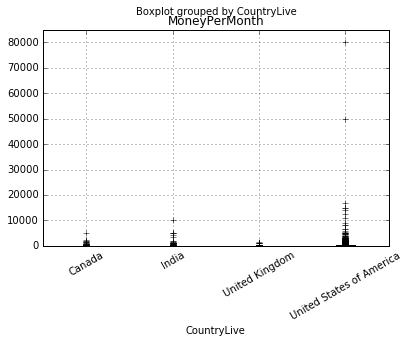

In [254]:
fcc_dropna_job_money[fcc_dropna_job_money['CountryLive'].\
                     isin(eng_countries)].boxplot(column='MoneyPerMonth',\
                                                  by='CountryLive',\
                                                  rot=30)
plt.ylim(0,85000)
plt.show()

There are som eoutlier in US data. We'll remove every value that goes over \$20,000 per month.

In [255]:
fcc_clean20k = fcc_dropna_job_money[fcc_dropna_job_money['MoneyPerMonth'] <\
                                    20000]

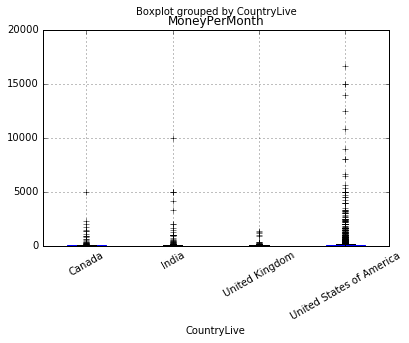

In [256]:
fcc_clean20k[fcc_clean20k['CountryLive'].isin(eng_countries)].\
boxplot(column='MoneyPerMonth', by='CountryLive', rot=30)
plt.ylim(0,20000)
plt.show()

In [257]:
# checking outlier for india
india_outlier = fcc_clean20k[(fcc_clean20k['CountryLive'] == 'India') \
             & (fcc_clean20k['MoneyPerMonth'] > 2500)]
india_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Web_Mobile,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,4166.666667


In all cases the paticipants havn't been to any bootcamps, so the money they spend seems not reasonable, we romove these outilers:

In [258]:
fcc_clean = fcc_clean20k.drop(india_outlier.index).copy()

In [259]:
# checking outliers for US
us_outlier = fcc_clean[(fcc_clean['CountryLive'] ==\
                              'United States of America') \
             & (fcc_clean['MoneyPerMonth'] > 5000)]
us_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Web_Mobile,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6500.000000
3145,34.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5666.666667
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,1.0,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8000.000000
13145,44.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5333.333333


In [260]:
# us - removing outlier who did not go to bootcamp and spend a lot of money

us_outlier_boot = fcc_clean[(fcc_clean['CountryLive'] ==\
                              'United States of America') \
             & (fcc_clean['MoneyPerMonth'] > 5000) &\
                     (fcc_clean['AttendedBootcamp'] == 0)]
fcc_clean = fcc_clean.drop(us_outlier_boot.index).copy()

In [261]:
# us - removing outlier who started less then 3 months before survey and sepent a lot of money

us_outlier_month = fcc_clean[(fcc_clean['CountryLive'] ==\
                              'United States of America') \
             & (fcc_clean['MoneyPerMonth'] > 5000) &\
                     (fcc_clean['MonthsProgramming'] <= 3)]
fcc_clean = fcc_clean.drop(us_outlier_month.index).copy()

In [262]:
# checking outliers for canada
canada_outlier = fcc_clean[(fcc_clean['CountryLive'] == 'Canada') \
             & (fcc_clean['MoneyPerMonth'] > 4500)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Web_Mobile,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,5000.0


In [263]:
# Canada - removing outlier who started less then 3 months before survey and spent a lot of money
 
fcc_clean = fcc_clean.drop(canada_outlier.index).copy()

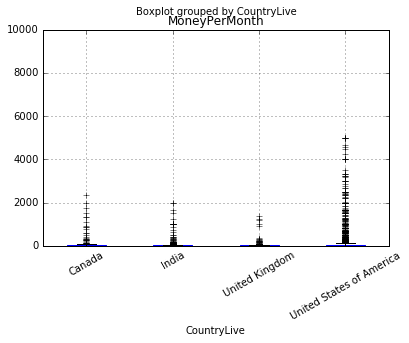

In [264]:
fcc_clean[fcc_clean['CountryLive'].isin(eng_countries)].\
boxplot(column='MoneyPerMonth', by='CountryLive', rot=30)
plt.ylim(0,10000)
plt.show()

looks like there are no more obvious outliers, so we re-calculate the average money spend per month for each country

In [265]:
fcc_clean.groupby(by='CountryLive').mean().loc[eng_countries, 'MoneyPerMonth']

CountryLive
United States of America    138.982678
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64

Based on the avergae monthly spending US, Canada and India look more interesting than UK. If we consider also the percentage of the participants:
United States of America    45.7%, 
India                        7.7%, 
United Kingdom               4.6%, 
Canada                       3.8%, 
the potential customers in india are two times more than Canada which migh offset the money spent per month in Canada (1.5 times higher in Canada than India). 


--------
Conclusion
----------

The only solid conclusion we reached is that the US would be a good market to advertise in (hihg number of potential customers + high value of money spent per month). 

For the second country both India nad Canada look interesting. However as the potential number of customers are higher in india this can offset the higher money spent by Canadians.
